<a href="https://colab.research.google.com/github/joshuabusinge/SplitAgentDeposit-Fraud/blob/main/SplitAgentDepositML_Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (
    classification_report, accuracy_score, precision_score,
    recall_score, f1_score, matthews_corrcoef, make_scorer,
    confusion_matrix
)
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# read data
df = pd.read_csv('/content/drive/MyDrive/MASTERS_DEGREE/Makerere_Unversity/Project Data/MoMTSim_20230525133535_1000_rawLog.csv')
df.head()

,0,DEPOSIT,19414.74,4.22142E+15,97.59,19512.33,76-0004369,0.1,0.2,1,0.3,0.4,0.5
0,0,DEPOSIT,23939.39,4.629230e+15,4925.03,28864.42,76-0004369,0.0,0.0,1,0,0,0
1,0,DEPOSIT,23288.45,4.734790e+15,72.37,23360.82,76-0004369,0.0,0.0,1,0,0,0
2,0,DEPOSIT,23210.04,4.734790e+15,23360.82,46570.86,76-0004369,0.0,0.0,1,0,0,0
3,0,DEPOSIT,23193.08,4.868780e+15,43.00,23236.09,76-0004369,0.0,0.0,1,0,0,0
4,0,DEPOSIT,19029.53,4.218830e+15,86.30,19115.83,76-0004369,0.0,0.0,1,0,0,0


In [4]:
# Assign column names
df.columns = ['step','transaction_type','amount','nameOrig','oldBalStartingClient','newBalStartingClient','nameDest','oldBalDestClient','newBalDestClient','isFraud','isFlaggedFraud','isUnauthorizedOverdraft','unnamed']

df.head()

,step,transaction_type,amount,nameOrig,oldBalStartingClient,newBalStartingClient,nameDest,oldBalDestClient,newBalDestClient,isFraud,isFlaggedFraud,isUnauthorizedOverdraft,unnamed
0,0,DEPOSIT,23939.39,4.629230e+15,4925.03,28864.42,76-0004369,0.0,0.0,1,0,0,0
1,0,DEPOSIT,23288.45,4.734790e+15,72.37,23360.82,76-0004369,0.0,0.0,1,0,0,0
2,0,DEPOSIT,23210.04,4.734790e+15,23360.82,46570.86,76-0004369,0.0,0.0,1,0,0,0
3,0,DEPOSIT,23193.08,4.868780e+15,43.00,23236.09,76-0004369,0.0,0.0,1,0,0,0
4,0,DEPOSIT,19029.53,4.218830e+15,86.30,19115.83,76-0004369,0.0,0.0,1,0,0,0


In [5]:
column_mean = df['amount'].mean()
print(column_mean)

116802.14264621984


In [6]:
column_mean = df['oldBalStartingClient'].max()
print(column_mean)

25871669.97


In [7]:
column_mean = df['oldBalDestClient'].mean()
print(column_mean)

410908.3572629711


In [8]:
column_mean = df['newBalDestClient'].mean()
print(column_mean)

448114.0335020478


In [9]:
# Assuming you have a DataFrame named 'df' with a column named 'amount'
column_values = df['amount']

# Example comparison: Comparing if values are greater than a threshold
threshold = 480000
comparison_result = column_values > threshold

filtered_df = df[comparison_result]
# Print the comparison result
print(filtered_df)

         step transaction_type     amount      nameOrig  oldBalStartingClient  \
4818        7         TRANSFER  527727.15  4.987290e+15                 85.06   
5300        7         TRANSFER  676450.65  4.741650e+15                 15.97   
5461        7          DEPOSIT  488058.93  4.581000e+15             403112.85   
14452       8         TRANSFER  879951.79  4.462730e+15            3183181.29   
16087       9         TRANSFER  540110.48  4.307890e+15             126712.38   
...       ...              ...        ...           ...                   ...   
1040357   567         TRANSFER  595195.99  4.152880e+15            5841087.92   
1041692   571         TRANSFER  552509.58  4.780340e+15            4879619.48   
1041735   571         TRANSFER  500299.12  4.517530e+15            5263304.49   
1041967   571         TRANSFER  805066.96  4.860480e+15            4418794.08   
1043095   573         TRANSFER  486819.03  4.525300e+15            6128807.80   

         newBalStartingClie

In [10]:
df.describe().round(3)

,step,amount,nameOrig,oldBalStartingClient,newBalStartingClient,oldBalDestClient,newBalDestClient,isFraud,isFlaggedFraud,isUnauthorizedOverdraft,unnamed
count,1048575.000,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575.000,1048575.0,1048575.000,1048575.000
mean,207.234,1.168021e+05,4.507891e+15,3.650976e+06,3.643406e+06,4.109084e+05,4.481140e+05,0.246,0.0,0.001,0.223
std,141.467,2.753692e+05,2.858012e+14,1.800254e+06,1.773885e+06,9.342412e+05,1.080694e+06,0.431,0.0,0.036,0.416
min,0.000,1.900000e-01,4.000120e+15,-1.905846e+05,-1.905846e+05,-1.225961e+05,-8.438479e+04,0.000,0.0,0.000,0.000
25%,93.000,1.877646e+04,4.259770e+15,2.764528e+06,2.763685e+06,9.237079e+04,9.626278e+04,0.000,0.0,0.000,0.000
50%,202.000,4.828541e+04,4.502840e+15,3.558997e+06,3.548073e+06,2.572574e+05,2.619636e+05,0.000,0.0,0.000,0.000
75%,306.000,1.476167e+05,4.761840e+15,4.339911e+06,4.319792e+06,4.401636e+05,4.453655e+05,0.000,0.0,0.000,0.000
max,584.000,1.545914e+07,4.999990e+15,2.587167e+07,2.587167e+07,3.403364e+07,3.444896e+07,1.000,0.0,1.000,1.000


In [11]:
df['amount'].value_counts()

comparison_result = column_values > threshold

filtered_df = df[comparison_result]
# Print the comparison result
print(filtered_df)

         step transaction_type     amount      nameOrig  oldBalStartingClient  \
4818        7         TRANSFER  527727.15  4.987290e+15                 85.06   
5300        7         TRANSFER  676450.65  4.741650e+15                 15.97   
5461        7          DEPOSIT  488058.93  4.581000e+15             403112.85   
14452       8         TRANSFER  879951.79  4.462730e+15            3183181.29   
16087       9         TRANSFER  540110.48  4.307890e+15             126712.38   
...       ...              ...        ...           ...                   ...   
1040357   567         TRANSFER  595195.99  4.152880e+15            5841087.92   
1041692   571         TRANSFER  552509.58  4.780340e+15            4879619.48   
1041735   571         TRANSFER  500299.12  4.517530e+15            5263304.49   
1041967   571         TRANSFER  805066.96  4.860480e+15            4418794.08   
1043095   573         TRANSFER  486819.03  4.525300e+15            6128807.80   

         newBalStartingClie

In [12]:
df_split_fraud = df[['transaction_type','isFraud']]

df_split_fraud.head()

,transaction_type,isFraud
0,DEPOSIT,1
1,DEPOSIT,1
2,DEPOSIT,1
3,DEPOSIT,1
4,DEPOSIT,1


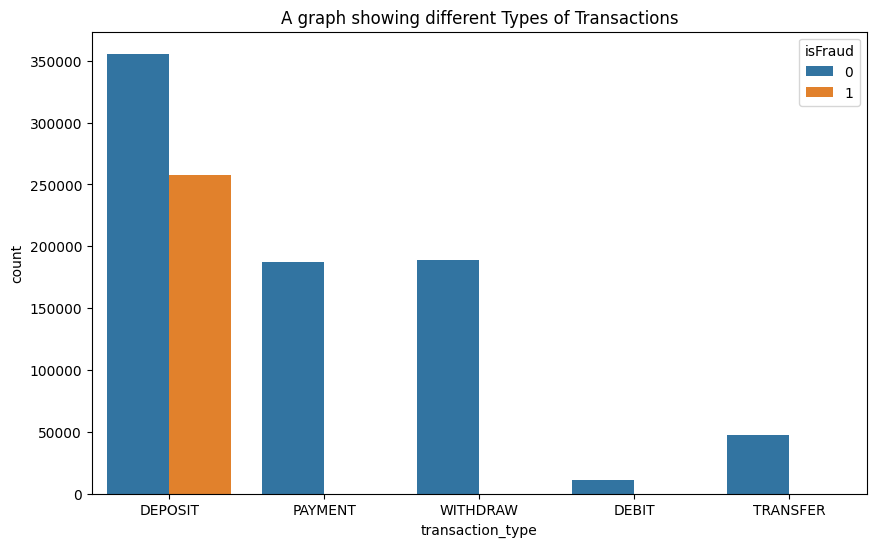

In [13]:
plt.figure(figsize=(10,6))
transaction_type = sns.countplot(x='transaction_type',hue='isFraud', data=df)
plt.title('A graph showing different Types of Transactions')
with PdfPages('transaction_type.pdf') as pdf:
    pdf.savefig()
plt.show()

The sum of the total counts of the transaction types is 1048575.
      index  Fraud Percentage  Non-Fraud Percentage
0   DEPOSIT         24.582219             33.923849
1  WITHDRAW               NaN             18.042677
2   PAYMENT               NaN             17.862528
3  TRANSFER               NaN              4.512887
4     DEBIT               NaN              1.075841


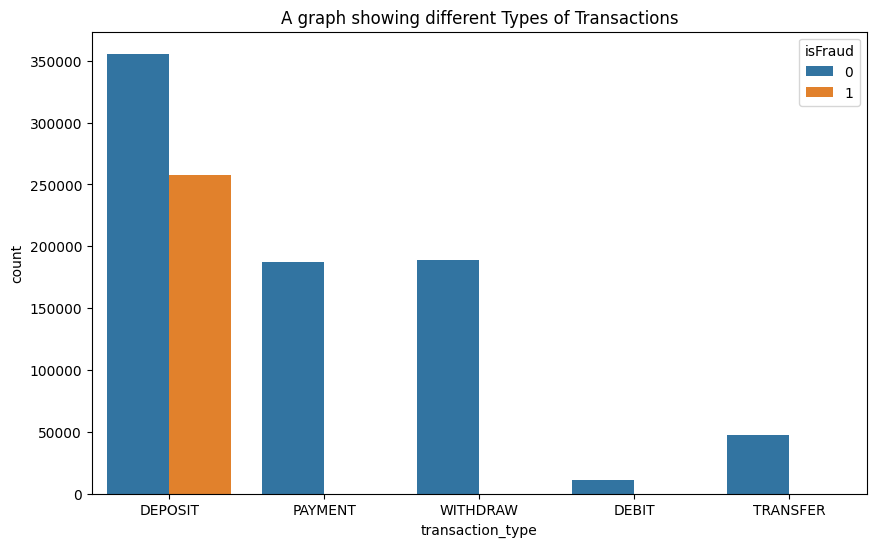

In [14]:
total_counts = df['transaction_type'].value_counts()
total_counts_sum = total_counts.sum()
print(f"The sum of the total counts of the transaction types is {total_counts_sum}.")

# Calculate the count of fraudulent transactions for each transaction type
fraud_counts = df[df['isFraud'] == 1]['transaction_type'].value_counts()

# Calculate the count of non-fraudulent transactions for each transaction type
nonfraud_counts = df[df['isFraud'] == 0]['transaction_type'].value_counts()

# Calculate the percentage of fraudulent transactions for each transaction type
fraud_percentages = (fraud_counts / total_counts_sum) * 100

# Calculate the percentage of non-fraudulent transactions for each transaction type
nonfraud_percentages = (nonfraud_counts / total_counts_sum) * 100

# Combine the fraud_percentages and nonfraud_percentages into a single dataframe
results_df = pd.concat([fraud_percentages, nonfraud_percentages], axis=1)

# Rename the columns to Fraud Percentage and Non-Fraud Percentage
results_df.columns = ['Fraud Percentage', 'Non-Fraud Percentage']

# Reset the index to add the Transaction Type column back
results_df = results_df.reset_index()
print(results_df)
# # Set the style of the plot
# sns.set(style="whitegrid")

# Add percentage values on top of the bars
total = len(df)  # Total number of transactions
for p in transaction_type.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_counts_sum)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    transaction_type.annotate(percentage, (x, y), ha='center')


plt.figure(figsize=(10,6))
transaction_type = sns.countplot(x='transaction_type', hue='isFraud', data=df)
plt.title('A graph showing different Types of Transactions')


# save the plot as a PDF
with PdfPages('transaction_type.pdf') as pdf:
    pdf.savefig()
plt.show()

In [15]:
# drop the unnamed and id columns.
columns= ['unnamed','transaction_type','nameDest','isFlaggedFraud', 'isUnauthorizedOverdraft']

df_split_fraud = df.drop(columns, axis=1)
df_split_fraud.head()


,step,amount,nameOrig,oldBalStartingClient,newBalStartingClient,oldBalDestClient,newBalDestClient,isFraud
0,0,23939.39,4.629230e+15,4925.03,28864.42,0.0,0.0,1
1,0,23288.45,4.734790e+15,72.37,23360.82,0.0,0.0,1
2,0,23210.04,4.734790e+15,23360.82,46570.86,0.0,0.0,1
3,0,23193.08,4.868780e+15,43.00,23236.09,0.0,0.0,1
4,0,19029.53,4.218830e+15,86.30,19115.83,0.0,0.0,1


In [16]:
# drop the step, nameOrig and id columns.
columns= ['step','nameOrig','isFraud']

new_df = df_split_fraud.drop(columns, axis=1)
new_df.describe().round(3)


,amount,oldBalStartingClient,newBalStartingClient,oldBalDestClient,newBalDestClient
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.168021e+05,3.650976e+06,3.643406e+06,4.109084e+05,4.481140e+05
std,2.753692e+05,1.800254e+06,1.773885e+06,9.342412e+05,1.080694e+06
min,1.900000e-01,-1.905846e+05,-1.905846e+05,-1.225961e+05,-8.438479e+04
25%,1.877646e+04,2.764528e+06,2.763685e+06,9.237079e+04,9.626278e+04
50%,4.828541e+04,3.558997e+06,3.548073e+06,2.572574e+05,2.619636e+05
75%,1.476167e+05,4.339911e+06,4.319792e+06,4.401636e+05,4.453655e+05
max,1.545914e+07,2.587167e+07,2.587167e+07,3.403364e+07,3.444896e+07


In [17]:
# no of rows and columns
df_split_fraud.shape

(1048575, 8)

In [18]:
# Checking the data types
df_split_fraud.dtypes

step                      int64
amount                  float64
nameOrig                float64
oldBalStartingClient    float64
newBalStartingClient    float64
oldBalDestClient        float64
newBalDestClient        float64
isFraud                   int64
dtype: object

In [19]:
# Count class labels
df_split_fraud['isFraud'].value_counts()

0    790812
1    257763
Name: isFraud, dtype: int64

### Data **visualization**

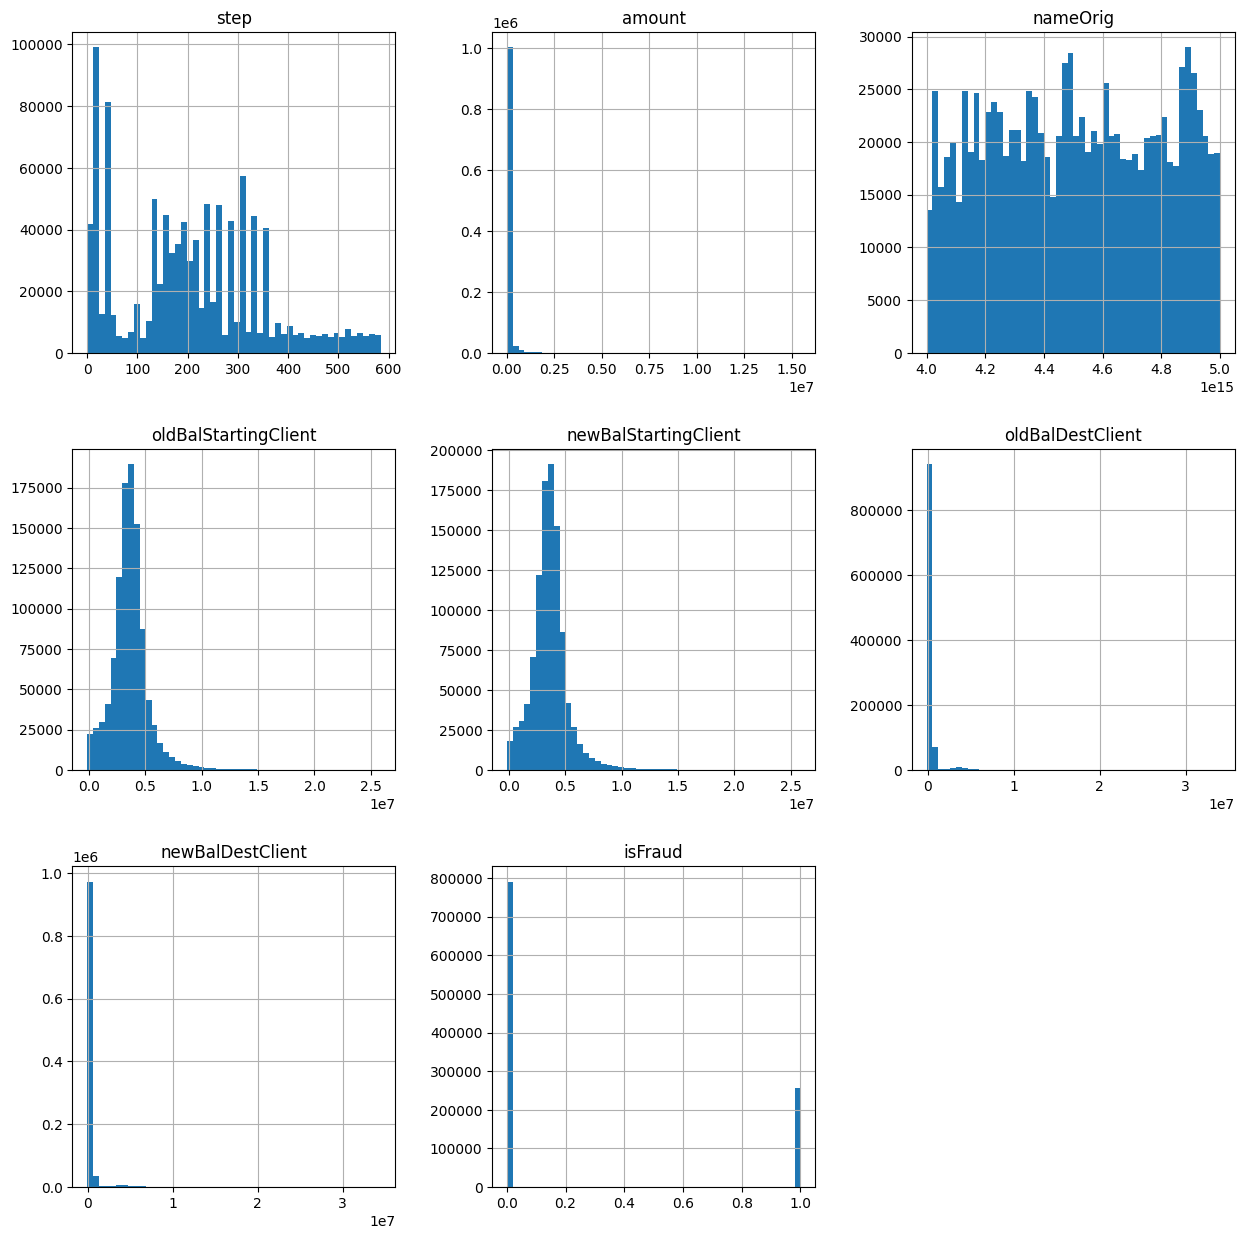

In [20]:
# Data visualization to create histogram
data_visulization = df_split_fraud.hist(bins=50, figsize=(15, 15))
with PdfPages('data_visulization.pdf') as pdf:
    pdf.savefig()
plt.show()

In [21]:
from sklearn.preprocessing import MinMaxScaler

# Creating an Object of StandardScaler
scaler = MinMaxScaler()

# Fit the dataframe to the scaler
print(scaler.fit(df_split_fraud))

MinMaxScaler()


In [22]:
# Transform the dataframe
features_scaled = scaler.transform(df_split_fraud)

# Convertin the scaled array to dataframe
features_scaled = pd.DataFrame(features_scaled, columns=df_split_fraud.columns)
features_scaled.shape
features_scaled.head()


,step,amount,nameOrig,oldBalStartingClient,newBalStartingClient,oldBalDestClient,newBalDestClient,isFraud
0,0.0,0.001549,0.629192,0.007502,0.008420,0.003589,0.002444,1.0
1,0.0,0.001506,0.734766,0.007315,0.008209,0.003589,0.002444,1.0
2,0.0,0.001501,0.734766,0.008209,0.009100,0.003589,0.002444,1.0
3,0.0,0.001500,0.868773,0.007314,0.008204,0.003589,0.002444,1.0
4,0.0,0.001231,0.218738,0.007316,0.008046,0.003589,0.002444,1.0


In [23]:
column_mean = features_scaled['amount'].mean()
print(column_mean)

0.007555529162359768


In [24]:
features_scaled.describe().round(3)

,step,amount,nameOrig,oldBalStartingClient,newBalStartingClient,oldBalDestClient,newBalDestClient,isFraud
count,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000
mean,0.355,0.008,0.508,0.147,0.147,0.016,0.015,0.246
std,0.242,0.018,0.286,0.069,0.068,0.027,0.031,0.431
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.159,0.001,0.260,0.113,0.113,0.006,0.005,0.000
50%,0.346,0.003,0.503,0.144,0.143,0.011,0.010,0.000
75%,0.524,0.010,0.762,0.174,0.173,0.016,0.015,0.000
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


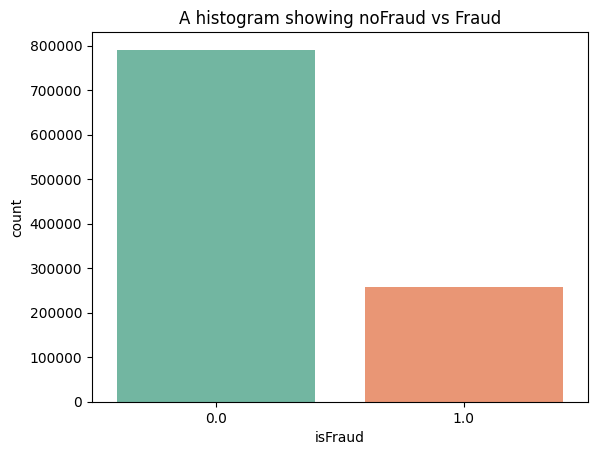

In [25]:
# Count each label
ax = sns.countplot(x='isFraud', data=features_scaled, palette='Set2')
plt.title('A histogram showing noFraud vs Fraud')
with PdfPages('ax.pdf') as pdf:
    pdf.savefig()

In [26]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE
# Instantiate the SMOTE object
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to your feature data and labels
X_resampled, y_resampled = smote.fit_resample(features_scaled, features_scaled['isFraud'])

# Now, X_resampled contain the resampled data with balanced classes.


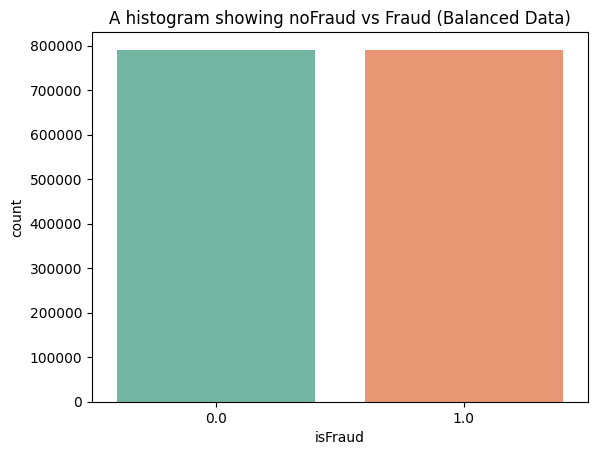

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with the balanced data
#balanced_data = pd.concat([X_resampled, y_resampled], axis=1)

# Create a countplot to visualize the balanced data
ax = sns.countplot(x='isFraud', data=X_resampled, palette='Set2')
plt.title('A histogram showing noFraud vs Fraud (Balanced Data)')

# Show the plot
plt.show()


<Axes: >

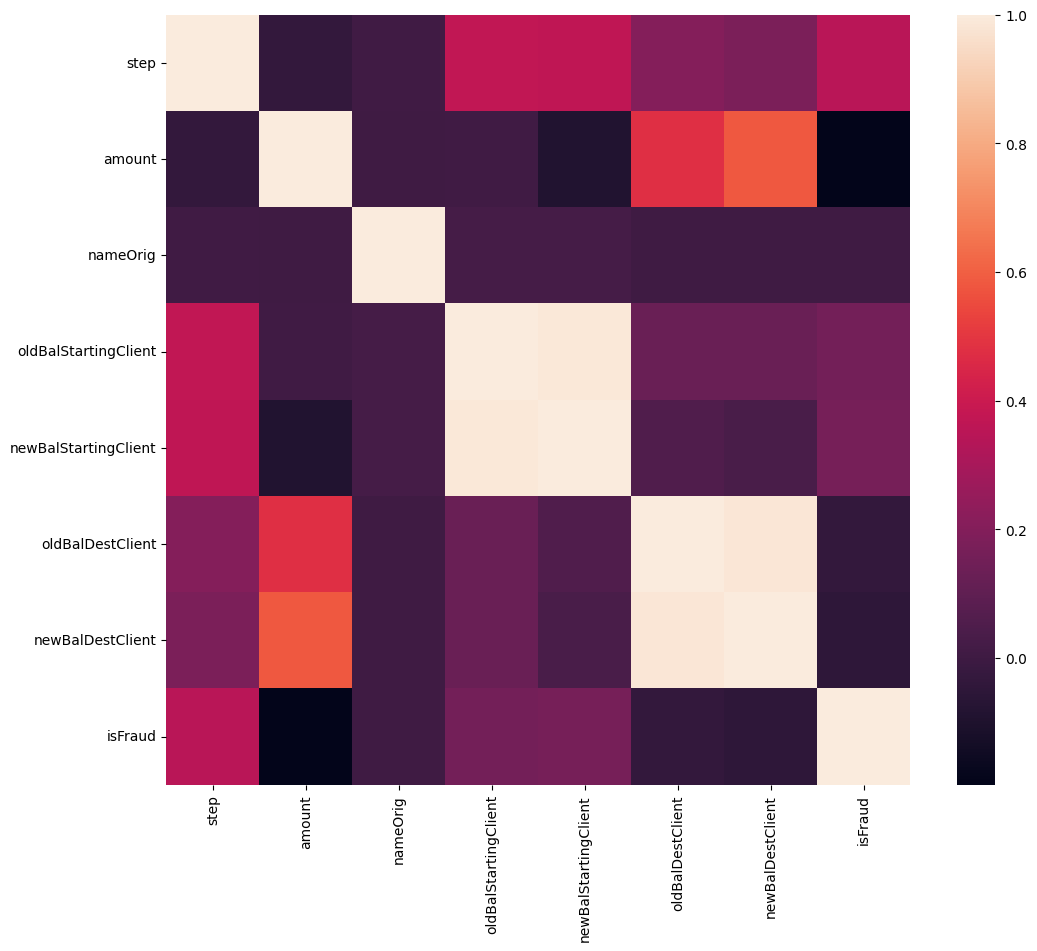

In [28]:
# Finding correlation
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(df_split_fraud.corr(), ax=ax)

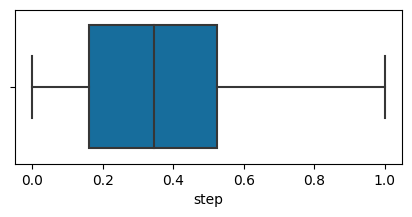

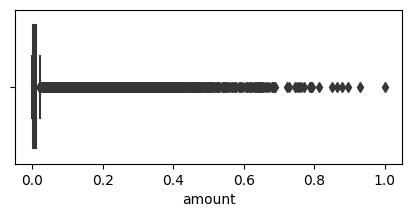

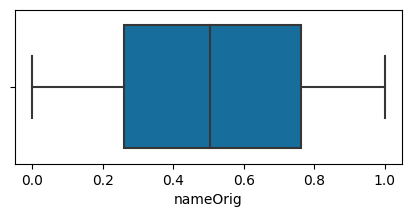

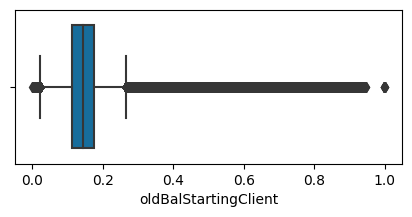

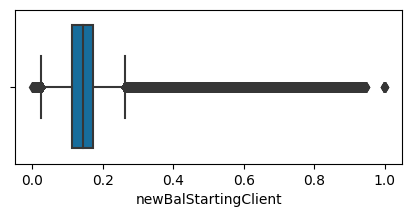

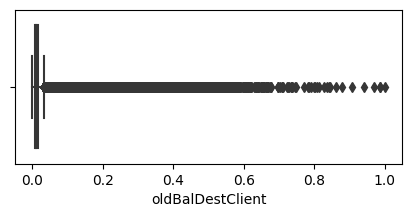

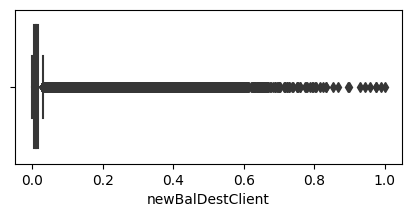

In [29]:
# box plot to check outlier in each category
def boxPlot(dff):
    d = dff.drop(columns=['isFraud'])
    for column in d:
        plt.figure(figsize=(5, 2))
        sns.boxplot(x=column, data=d, palette="colorblind")

boxPlot(features_scaled)

In [30]:
# Separate labels and features
X = features_scaled.drop(columns=['isFraud'])
y = features_scaled['isFraud']

In [31]:
# Spilt the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# we used 30% test data
# check the size before beginning
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((734002, 7), (314573, 7), (734002,), (314573,))

****************************************************
LogisticRegression
Training Set Accuracy: 0.8216503497265675
Test Set Accuracy: 0.8213037991181698 ROC: 0.675129178583483
Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89    237385
         1.0       0.77      0.39      0.52     77188

    accuracy                           0.82    314573
   macro avg       0.80      0.68      0.70    314573
weighted avg       0.81      0.82      0.80    314573

Cross-validation Results:
   fit_time  score_time  accuracy  precision    recall  f1_score  \
0  4.474941    0.203272  0.821297   0.777990  0.382877  0.513194   
1  3.739748    0.192015  0.822060   0.781204  0.384373  0.515236   
2  3.813361    0.264615  0.822807   0.780206  0.389433  0.519542   
3  5.104500    0.200003  0.821090   0.775725  0.383674  0.513413   
4  4.148845    0.207193  0.821689   0.779251  0.383951  0.514432   
5  3.192393    0.197780  0.823924   0.784

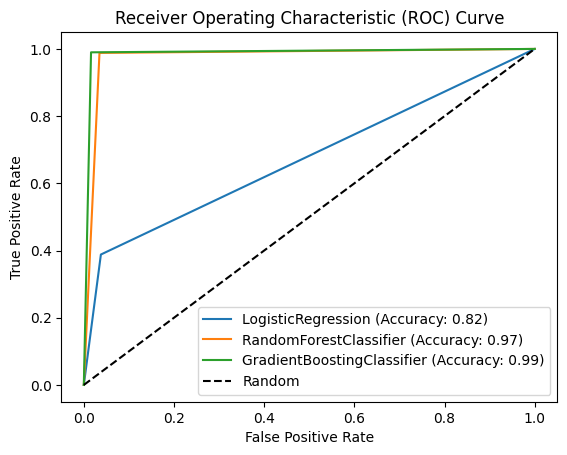

In [32]:
# Define the models
models = [
    LogisticRegression(),
    RandomForestClassifier(n_estimators=20, max_depth=10),
    GradientBoostingClassifier(n_estimators=20, max_depth=10)
]

# Define scoring metric for cross-validation
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1_score': make_scorer(f1_score),
    'matthews_corrcoef': make_scorer(matthews_corrcoef)
}

# Initialize lists to store results
acc = []
roc = []

# Define function to print cross-validation results
def print_result(result):
    df = pd.DataFrame(result)
    df = df.rename(columns=lambda x: x.replace('test_', ''))
    print(df)

# Execute the code for each model
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    ac = accuracy_score(y_test, y_pred)
    acc.append(ac)
    ac_train = accuracy_score(y_train, y_pred_train)
    rc = roc_auc_score(y_test, y_pred)
    roc.append(rc)
    print("****************************************************")
    print(type(model).__name__)
    print("Training Set Accuracy:", ac_train)
    print("Test Set Accuracy: {0} ROC: {1}".format(ac, rc))

    # Classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Cross-validation
    result = cross_validate(model, X_train, y_train, scoring=scoring, cv=10)
    print("Cross-validation Results:")
    print_result(result)

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, label=f"{type(model).__name__} (Accuracy: {ac:.2f})")


# Set plot attributes
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

# Create a PDF to save the plot
with PdfPages('roc_curve.pdf') as pdf:
    pdf.savefig()

# Print the model, accuracy, and AUC scores
results_df = pd.DataFrame({
    'Model': [type(model).__name__ for model in models],
    'Accuracy': acc,
    'AUC': roc
})
print(results_df)


In [33]:
# Separate labels and features
X = X_resampled.drop(columns=['isFraud'])
y = X_resampled['isFraud']

# Spilt the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# we used 30% test data
# check the size before beginning
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1107136, 7), (474488, 7), (1107136,), (474488,))

****************************************************
LogisticRegression
Training Set Accuracy: 0.7802474131452685
Test Set Accuracy: 0.78009138271147 ROC: 0.7800359551946117
Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.72      0.77    237033
         1.0       0.75      0.84      0.79    237455

    accuracy                           0.78    474488
   macro avg       0.78      0.78      0.78    474488
weighted avg       0.78      0.78      0.78    474488

Cross-validation Results:
   fit_time  score_time  accuracy  precision    recall  f1_score  \
0  5.324154    0.309660  0.777399   0.748522  0.835243  0.789508   
1  5.906280    0.447885  0.777174   0.747163  0.837628  0.789814   
2  6.858309    0.308285  0.779450   0.750421  0.837158  0.791420   
3  4.639830    0.297857  0.779432   0.749750  0.838604  0.791692   
4  6.405909    0.305825  0.778086   0.747909  0.838695  0.790704   
5  5.665580    0.303276  0.778086   0.7478

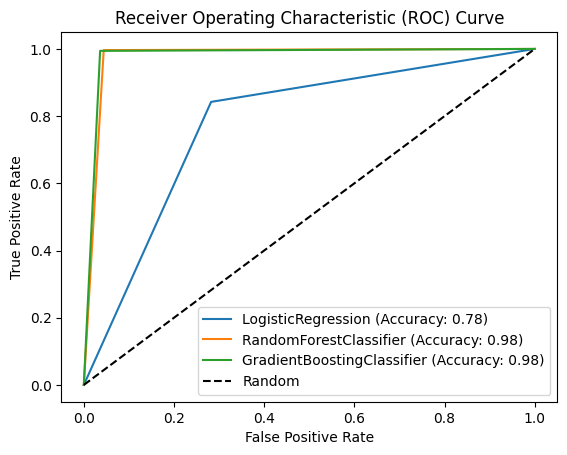

In [34]:
# Define the models
models = [
    LogisticRegression(),
    RandomForestClassifier(n_estimators=20, max_depth=10),
    GradientBoostingClassifier(n_estimators=20, max_depth=10)
]

# Define scoring metric for cross-validation
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1_score': make_scorer(f1_score),
    'matthews_corrcoef': make_scorer(matthews_corrcoef)
}

# Initialize lists to store results
acc = []
roc = []

# Define function to print cross-validation results
def print_result(result):
    df = pd.DataFrame(result)
    df = df.rename(columns=lambda x: x.replace('test_', ''))
    print(df)

# Execute the code for each model
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    ac = accuracy_score(y_test, y_pred)
    acc.append(ac)
    ac_train = accuracy_score(y_train, y_pred_train)
    rc = roc_auc_score(y_test, y_pred)
    roc.append(rc)
    print("****************************************************")
    print(type(model).__name__)
    print("Training Set Accuracy:", ac_train)
    print("Test Set Accuracy: {0} ROC: {1}".format(ac, rc))

    # Classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Cross-validation
    result = cross_validate(model, X_train, y_train, scoring=scoring, cv=10)
    print("Cross-validation Results:")
    print_result(result)

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, label=f"{type(model).__name__} (Accuracy: {ac:.2f})")


# Set plot attributes
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

# Create a PDF to save the plot
with PdfPages('roc_curve.pdf') as pdf:
    pdf.savefig()

# Print the model, accuracy, and AUC scores
results_df = pd.DataFrame({
    'Model': [type(model).__name__ for model in models],
    'Accuracy': acc,
    'AUC': roc
})
print(results_df)
